In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('vehicles.csv')
raw_data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
raw_data.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN


In [4]:
raw_data.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

### Dropping unnecessary variables

In [5]:
data = raw_data.copy()
data = data.drop(['id','url','region_url','image_url','description','posting_date','VIN','county','paint_color','region','lat','long','model','size'], axis=1)
data

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,wy
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,wy
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


In [6]:
data.isnull().sum()

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
state                0
dtype: int64

Dropping condition, cylinders, drive, and type, because they have too many missing values.

In [7]:
data = data.drop(['condition','cylinders','drive','type'], axis=1)
data

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,gas,32226.0,clean,other,wy
426876,30590,2020.0,volvo,gas,12029.0,clean,other,wy
426877,34990,2020.0,cadillac,diesel,4174.0,clean,other,wy
426878,28990,2018.0,lexus,gas,30112.0,clean,other,wy


In [8]:
data.isnull().sum()

price               0
year             1205
manufacturer    17646
fuel             3013
odometer         4400
title_status     8242
transmission     2556
state               0
dtype: int64

### Dropping records with missing values

In [9]:
data_no_mv = data.dropna(axis=0)
data_no_mv = data_no_mv.reset_index(drop=True)

In [10]:
data_no_mv

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
0,33590,2014.0,gmc,gas,57923.0,clean,other,al
1,22590,2010.0,chevrolet,gas,71229.0,clean,other,al
2,39590,2020.0,chevrolet,gas,19160.0,clean,other,al
3,30990,2017.0,toyota,gas,41124.0,clean,other,al
4,15000,2013.0,ford,gas,128000.0,clean,automatic,al
...,...,...,...,...,...,...,...,...
394746,23590,2019.0,nissan,gas,32226.0,clean,other,wy
394747,30590,2020.0,volvo,gas,12029.0,clean,other,wy
394748,34990,2020.0,cadillac,diesel,4174.0,clean,other,wy
394749,28990,2018.0,lexus,gas,30112.0,clean,other,wy


### Checking distribution of variables

#### Price:

<AxesSubplot:xlabel='price', ylabel='Density'>

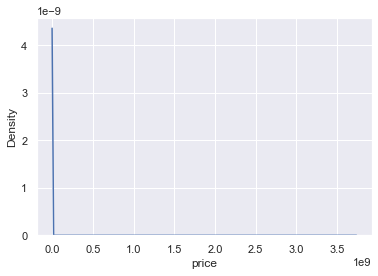

In [11]:
sns.kdeplot(data_no_mv['price'])

In [12]:
data_no_mv.describe()

,price,year,odometer
count,3.947510e+05,394751.000000,3.947510e+05
mean,7.928849e+04,2011.451778,9.697235e+04
std,1.266529e+07,9.013453,2.023136e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.800000e+04
50%,1.399500e+04,2014.000000,8.591600e+04
75%,2.659000e+04,2017.000000,1.335880e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [13]:
q = data_no_mv['price'].quantile(0.075)
q

1.0

Almost 8% of the entries are listed with a price of 0.
There are a lots of illegitimately low-priced entries, so I'm dropping everything with price below 500...

In [14]:
data_1 = data_no_mv.copy()
data_1 = data_1[data_1['price']>500]

In [15]:
data_1.sort_values(['price'], ascending=True).head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
36566,501,2016.0,gmc,gas,70153.0,clean,automatic,ca
34301,501,2016.0,gmc,gas,70153.0,clean,automatic,ca
298486,501,2020.0,subaru,gas,14672.0,clean,automatic,or
372179,501,2017.0,bmw,diesel,47982.0,clean,automatic,wa
129775,501,2018.0,jeep,gas,35087.0,clean,automatic,il


In [16]:
data_1.describe()

,price,year,odometer
count,3.570930e+05,357093.00000,3.570930e+05
mean,8.764476e+04,2011.20372,9.740294e+04
std,1.331635e+07,9.17787,1.807493e+05
min,5.010000e+02,1900.00000,0.000000e+00
25%,7.900000e+03,2008.00000,3.828200e+04
50%,1.599000e+04,2013.00000,8.792200e+04
75%,2.799000e+04,2017.00000,1.360000e+05
max,3.736929e+09,2022.00000,1.000000e+07


In [17]:
data_1.sort_values(['price'], ascending=False).head(100)

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
294538,3736928711,2007.0,toyota,gas,164000.0,clean,automatic,or
330046,3736928711,1999.0,toyota,gas,211000.0,clean,automatic,tn
83748,3024942282,2000.0,mercedes-benz,gas,100000.0,clean,automatic,de
237535,3024942282,2000.0,mercedes-benz,gas,100000.0,clean,automatic,nj
34424,3009548743,2021.0,chevrolet,gas,1000.0,clean,automatic,ca
...,...,...,...,...,...,...,...,...
255788,179999,2018.0,porsche,gas,11195.0,clean,automatic,ny
149089,179995,2013.0,ferrari,gas,4500.0,rebuilt,automatic,ia
40023,179888,2018.0,aston-martin,gas,7800.0,clean,automatic,ca
233626,175000,1966.0,ford,gas,81000.0,clean,manual,nj


Getting rid of anything priced over $350,000 to filter out the illegitimate entries shown above...

In [18]:
data_2 = data_1[data_1['price']<350000]
data_2.sort_values(['price'], ascending=False).head(10)

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
41632,349999,2020.0,ferrari,gas,2800.0,clean,automatic,ca
40715,347999,2020.0,ferrari,gas,3000.0,clean,automatic,ca
80937,304995,2021.0,porsche,gas,22.0,clean,automatic,dc
369930,304995,2021.0,porsche,gas,22.0,clean,automatic,va
82508,304995,2021.0,porsche,gas,22.0,clean,automatic,dc
345517,290000,2012.0,chrysler,gas,24000.0,clean,automatic,tx
117532,289995,2016.0,ferrari,gas,3675.0,clean,manual,hi
118302,289900,2018.0,ferrari,gas,3300.0,clean,automatic,hi
30480,255000,2018.0,mercedes-benz,gas,2000.0,clean,automatic,ca
15500,239995,2017.0,ferrari,gas,6012.0,clean,automatic,az


<AxesSubplot:xlabel='price', ylabel='Density'>

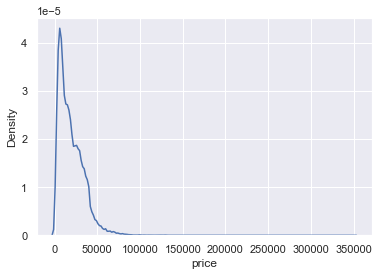

In [19]:
sns.kdeplot(data_2['price'])

#### Year:

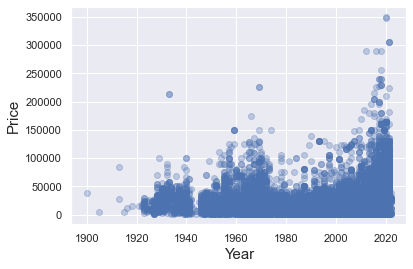

In [20]:
plt.scatter(data_2['year'], data_2['price'], alpha=0.3)
plt.xlabel('Year', size=15)
plt.ylabel('Price', size=15)

plt.show()

In [21]:
from sklearn.cluster import KMeans
data_2.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
0,33590,2014.0,gmc,gas,57923.0,clean,other,al
1,22590,2010.0,chevrolet,gas,71229.0,clean,other,al
2,39590,2020.0,chevrolet,gas,19160.0,clean,other,al
3,30990,2017.0,toyota,gas,41124.0,clean,other,al
4,15000,2013.0,ford,gas,128000.0,clean,automatic,al


In [22]:
xk = data_2.iloc[:,0:2]

In [23]:
from sklearn import preprocessing

xks = preprocessing.scale(xk)
xks

array([[ 0.96278266,  0.30459347],
       [ 0.21979498, -0.1315859 ],
       [ 1.36804867,  0.95886252],
       ...,
       [ 1.05734473,  0.95886252],
       [ 0.65207872,  0.74077283],
       [ 0.76014966,  0.84981768]])

In [24]:
wcss = []

for i in range(1,13):
    kmeans = KMeans(i)
    kmeans.fit(xks)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

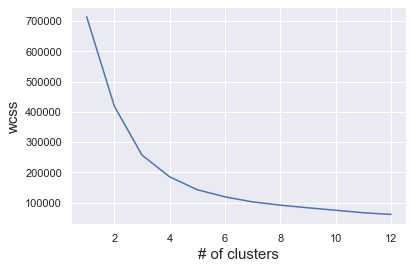

In [25]:
plt.plot(range(1,13), wcss)
plt.xlabel('# of clusters',size=15)
plt.ylabel('wcss',size=15)
plt.show()

In [26]:
kmeans = KMeans(5)
kmeans.fit(xks)

KMeans(n_clusters=5)

In [27]:
clusters = xk.copy()
clusters['Clusters'] = kmeans.fit_predict(xks)
clusters

,price,year,Clusters
0,33590,2014.0,1
1,22590,2010.0,3
2,39590,2020.0,1
3,30990,2017.0,1
4,15000,2013.0,3
...,...,...,...
394746,23590,2019.0,1
394747,30590,2020.0,1
394748,34990,2020.0,1
394749,28990,2018.0,1


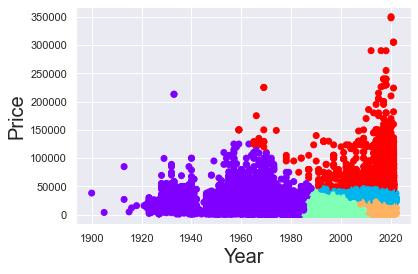

In [28]:
plt.scatter(clusters['year'], clusters['price'], c=clusters['Clusters'], cmap='rainbow')
plt.xlabel('Year',size=20)
plt.ylabel('Price',size=20)
plt.show()

Some observations from this cluster distribution: <br>
• The green cluster seems to be the classic/collector car category. <br>
• The orange cluster seems to be the higher-end brands (ex. ferrari, porsche, etc.). <br>
• The blue and red clusters seem (more or less) reasonable. <br>
• The purple cluster must be newer cars that have been damaged and lost a lot of value, or the owners are clickbaiting people on Craigslist by putting unreasonably low prices.

<AxesSubplot:xlabel='year', ylabel='Density'>

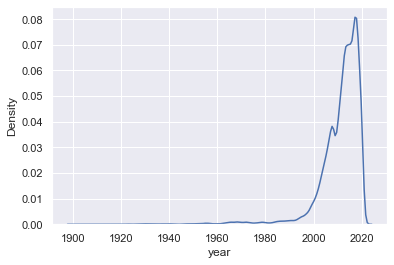

In [29]:
sns.kdeplot(data_2['year'])

I will get rid of all cars 1980 and below, because: <br>
• the elongated tail indicates that these are outlier datapoints, and <br>
• looking at the green cluster above, these appear to be the classic and collector cars that are definitely skewing the relationship of price and year

In [30]:
data_3 = data_2.copy()
data_3 = data_3[data_3['year']>1980]
data_3.sort_values(['year'], ascending=True).head(60)

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
63136,3500,1981.0,datsun,gas,70000.0,clean,manual,ca
369747,4800,1981.0,ford,gas,56000.0,clean,manual,va
155095,10000,1981.0,mercedes-benz,gas,113721.0,clean,automatic,ks
216233,21999,1981.0,jeep,gas,5.0,clean,manual,nc
350487,8500,1981.0,chevrolet,gas,50000.0,clean,automatic,tx
155219,8000,1981.0,chevrolet,gas,23000.0,clean,manual,ks
155269,1000,1981.0,ford,gas,245000.0,salvage,automatic,ks
344993,3500,1981.0,chevrolet,gas,70907.0,clean,automatic,tx
110682,15500,1981.0,chevrolet,gas,60000.0,clean,manual,ga
46052,5500,1981.0,toyota,gas,200000.0,clean,automatic,ca


<AxesSubplot:xlabel='year', ylabel='Density'>

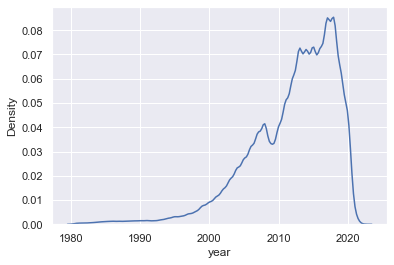

In [31]:
sns.kdeplot(data_3['year'])

#### Odometer:

<AxesSubplot:xlabel='odometer', ylabel='Density'>

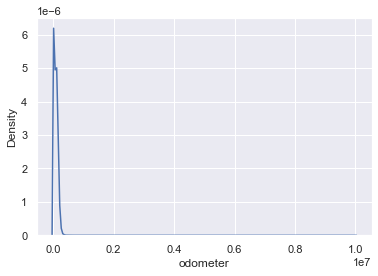

In [32]:
sns.kdeplot(data_3['odometer'])

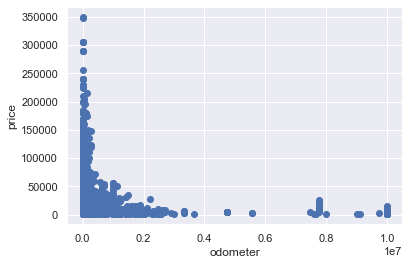

In [33]:
plt.scatter(data_3['odometer'], data_3['price'])
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

Right off the bat, I'm going to get rid of any (unrealistic) odometer values greater than 300,000:

In [34]:
data_4 = data_3.copy()
data_4 = data_4[data_4['odometer']<300000]
data_4.sort_values(['odometer'], ascending=False).head(50)

,price,year,manufacturer,fuel,odometer,title_status,transmission,state
31174,1600,2006.0,toyota,gas,299999.0,clean,automatic,ca
163104,2000,1996.0,ford,gas,299999.0,clean,manual,la
194831,2500,2005.0,toyota,gas,299999.0,clean,automatic,mn
393628,2450,2007.0,toyota,gas,299999.0,clean,manual,wi
218615,3350,2005.0,toyota,gas,299999.0,clean,automatic,nc
152235,1750,1996.0,gmc,gas,299900.0,clean,automatic,ks
2852,4719,2007.0,honda,gas,299776.0,clean,automatic,al
331559,6500,2006.0,gmc,gas,299719.0,clean,automatic,tn
224792,3500,2007.0,jeep,gas,299686.0,clean,automatic,nc
322907,3500,2007.0,jeep,gas,299686.0,clean,automatic,sc


In [35]:
xo = data_4.copy()
xo.columns.values

array(['price', 'year', 'manufacturer', 'fuel', 'odometer',
       'title_status', 'transmission', 'state'], dtype=object)

In [36]:
xo_col = ['price', 'odometer','year', 'manufacturer', 'fuel','title_status', 'transmission', 'state']
xo = xo[xo_col]
xo.head()

,price,odometer,year,manufacturer,fuel,title_status,transmission,state
0,33590,57923.0,2014.0,gmc,gas,clean,other,al
1,22590,71229.0,2010.0,chevrolet,gas,clean,other,al
2,39590,19160.0,2020.0,chevrolet,gas,clean,other,al
3,30990,41124.0,2017.0,toyota,gas,clean,other,al
4,15000,128000.0,2013.0,ford,gas,clean,automatic,al


In [37]:
xo = xo.iloc[:,0:2]
xos = preprocessing.scale(xo)

In [38]:
wcsso = []

for io in range(1,13):
    kmeanso = KMeans(io)
    kmeanso.fit(xos)
    wcsso_iter = kmeanso.inertia_
    wcsso.append(wcsso_iter)
    
wcsso

[697183.9999999731,
 327390.5996275168,
 228449.0118635869,
 178347.35225450786,
 146275.898108812,
 118296.34590691737,
 101912.75425847228,
 91550.27907663258,
 83084.99580954663,
 75732.00102351351,
 68462.81537580903,
 62632.236847510845]

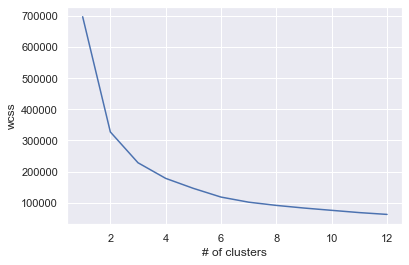

In [39]:
plt.plot(range(1,13), wcsso)
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

In [40]:
kmeans_odom = KMeans(5)
kmeans_odom.fit(xos)

KMeans(n_clusters=5)

In [41]:
clusters_odom = xo.copy()
clusters_odom['Clusters'] = kmeans_odom.fit_predict(xos)
clusters_odom.head()

,price,odometer,Clusters
0,33590,57923.0,0
1,22590,71229.0,4
2,39590,19160.0,0
3,30990,41124.0,0
4,15000,128000.0,1


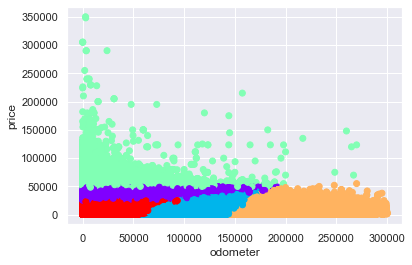

In [42]:
plt.scatter(clusters_odom['odometer'], clusters_odom['price'], c=clusters_odom['Clusters'], cmap='rainbow')
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

<AxesSubplot:xlabel='odometer', ylabel='Density'>

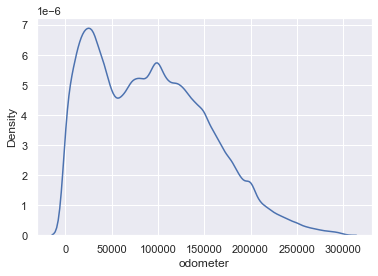

In [43]:
sns.kdeplot(data_4['odometer'])

<AxesSubplot:xlabel='sqrt_odometer', ylabel='Density'>

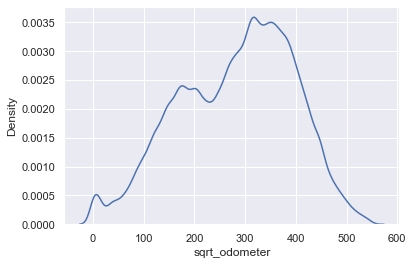

In [44]:
sq_odom = np.sqrt(data_4['odometer'])
data_4['sqrt_odometer'] = sq_odom

sns.kdeplot(data_4['sqrt_odometer'])

In [45]:
data_cleaned = data_4.reset_index(drop=True)

## Checking OLS assumptions

### 1. Linearity

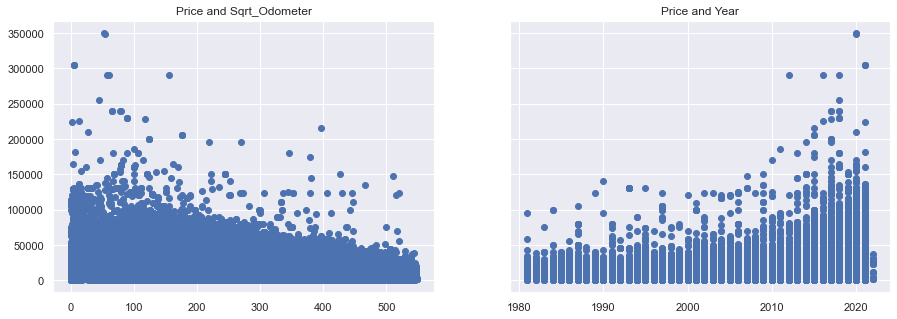

In [46]:
f, (g1, g2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
g1.scatter(data_cleaned['sqrt_odometer'], data_cleaned['price'])
g1.set_title('Price and Sqrt_Odometer')
g2.scatter(data_cleaned['year'], data_cleaned['price'])
g2.set_title('Price and Year')


plt.show()

Relationship is not linear, so will need to use a logarithmic transformation.

<AxesSubplot:xlabel='log_price', ylabel='Density'>

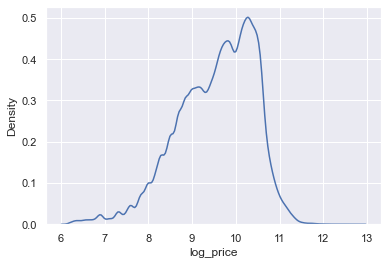

In [47]:
log_price = np.log(data_cleaned['price'])
data_cleaned['log_price'] = log_price

sns.kdeplot(data_cleaned['log_price'])



In [48]:
data_cleaned

,price,year,manufacturer,fuel,odometer,title_status,transmission,state,sqrt_odometer,log_price
0,33590,2014.0,gmc,gas,57923.0,clean,other,al,240.671976,10.421984
1,22590,2010.0,chevrolet,gas,71229.0,clean,other,al,266.887617,10.025263
2,39590,2020.0,chevrolet,gas,19160.0,clean,other,al,138.419652,10.586332
3,30990,2017.0,toyota,gas,41124.0,clean,other,al,202.790532,10.341420
4,15000,2013.0,ford,gas,128000.0,clean,automatic,al,357.770876,9.615805
...,...,...,...,...,...,...,...,...,...,...
348587,23590,2019.0,nissan,gas,32226.0,clean,other,wy,179.516016,10.068578
348588,30590,2020.0,volvo,gas,12029.0,clean,other,wy,109.676798,10.328428
348589,34990,2020.0,cadillac,diesel,4174.0,clean,other,wy,64.606501,10.462818
348590,28990,2018.0,lexus,gas,30112.0,clean,other,wy,173.528096,10.274706


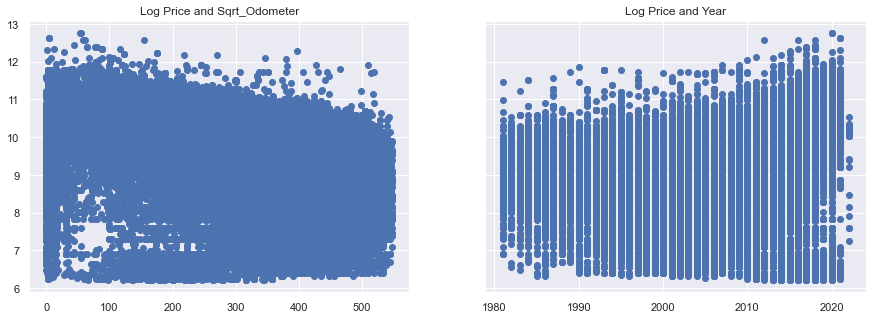

In [49]:
f, (g1, g2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
g1.scatter(data_cleaned['sqrt_odometer'], data_cleaned['log_price'])
g1.set_title('Log Price and Sqrt_Odometer')
g2.scatter(data_cleaned['year'], data_cleaned['log_price'])
g2.set_title('Log Price and Year')


plt.show()

<font color=red>Note: Is this acceptably linear for real-world data? ^</font>

In [50]:
data_cleaned = data_cleaned.drop(['price', 'odometer'], axis=1)
data_cleaned.head()

,year,manufacturer,fuel,title_status,transmission,state,sqrt_odometer,log_price
0,2014.0,gmc,gas,clean,other,al,240.671976,10.421984
1,2010.0,chevrolet,gas,clean,other,al,266.887617,10.025263
2,2020.0,chevrolet,gas,clean,other,al,138.419652,10.586332
3,2017.0,toyota,gas,clean,other,al,202.790532,10.341420
4,2013.0,ford,gas,clean,automatic,al,357.770876,9.615805


### 2. No Endogeneity of Regressors

• With this dataset, I am using all the potentially good regressors, so going to assume no Omitted Variable Bias

### 3. Normality, Zero Mean, and Homoscedasticity of Errors

• Assuming normality based on Central Limit Theorem (CLT) <br>
• Zero mean is taken care of by the intercept of the regression line <br>
• Heteroscedasticity taken care of by log transformation

### 4. No Autocorrelation / No Serial Correlation of Errors

• Observations are not dependent on each other <br>
• This is cross-sectional data, not time-series

### 5. No Multicollinearity

Checking for multicollinearity using variance inflation factor (vif):

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = data_cleaned[['sqrt_odometer', 'year']]
variables = add_constant(variables)

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["features"] = variables.columns

vif

/Users/muneebagha/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,features
0,157443.058708,const
1,1.509180,sqrt_odometer
2,1.509180,year


Very low vif indicates no multicollinearity

## Creating dummies for categorical variables

My categorical variables 'manufacturer' and 'state' are nominal, so I will use one-hot encoding.

In [52]:
data_wd = pd.get_dummies(data_cleaned, drop_first=True)
data_wd

,year,sqrt_odometer,log_price,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,2014.0,240.671976,10.421984,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010.0,266.887617,10.025263,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020.0,138.419652,10.586332,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017.0,202.790532,10.341420,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,357.770876,9.615805,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348587,2019.0,179.516016,10.068578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
348588,2020.0,109.676798,10.328428,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
348589,2020.0,64.606501,10.462818,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
348590,2018.0,173.528096,10.274706,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
data_wd.columns.values

array(['year', 'sqrt_odometer', 'log_price', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi',
       'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac',
       'manufacturer_chevrolet', 'manufacturer_chrysler',
       'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai',
       'manufacturer_infiniti', 'manufacturer_jaguar',
       'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover',
       'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mercedes-benz', 'manufacturer_mercury',
       'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_morgan', 'manufacturer_nissan',
       'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram',
       'manufacturer_rover', 'manufacturer_saturn', '

In [54]:
cols = ['log_price', 'year', 'sqrt_odometer', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi',
       'manufacturer_bmw', 'manufacturer_buick', 'manufacturer_cadillac',
       'manufacturer_chevrolet', 'manufacturer_chrysler',
       'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai',
       'manufacturer_infiniti', 'manufacturer_jaguar',
       'manufacturer_jeep', 'manufacturer_kia', 'manufacturer_land rover',
       'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mercedes-benz', 'manufacturer_mercury',
       'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_morgan', 'manufacturer_nissan',
       'manufacturer_pontiac', 'manufacturer_porsche', 'manufacturer_ram',
       'manufacturer_rover', 'manufacturer_saturn', 'manufacturer_subaru',
       'manufacturer_tesla', 'manufacturer_toyota',
       'manufacturer_volkswagen', 'manufacturer_volvo', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage',
       'transmission_manual', 'transmission_other', 'state_al',
       'state_ar', 'state_az', 'state_ca', 'state_co', 'state_ct',
       'state_dc', 'state_de', 'state_fl', 'state_ga', 'state_hi',
       'state_ia', 'state_id', 'state_il', 'state_in', 'state_ks',
       'state_ky', 'state_la', 'state_ma', 'state_md', 'state_me',
       'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt',
       'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj',
       'state_nm', 'state_nv', 'state_ny', 'state_oh', 'state_ok',
       'state_or', 'state_pa', 'state_ri', 'state_sc', 'state_sd',
       'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy']
data_preprocessed = data_wd[cols]
data_preprocessed

,log_price,year,sqrt_odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,10.421984,2014.0,240.671976,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.025263,2010.0,266.887617,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,10.586332,2020.0,138.419652,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10.341420,2017.0,202.790532,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.615805,2013.0,357.770876,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348587,10.068578,2019.0,179.516016,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
348588,10.328428,2020.0,109.676798,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
348589,10.462818,2020.0,64.606501,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
348590,10.274706,2018.0,173.528096,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Feature Scaling

In [55]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [57]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=26)

## Regression

In [59]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

##### Checking model by plotting predicted values against observed values:

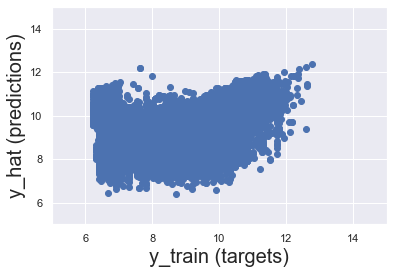

In [60]:
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('y_train (targets)', size=20)
plt.ylabel('y_hat (predictions)', size=20)
plt.xlim(5,15)
plt.ylim(5,15)

plt.show()

##### Checking model by plotting residuals:

<AxesSubplot:xlabel='log_price', ylabel='Density'>

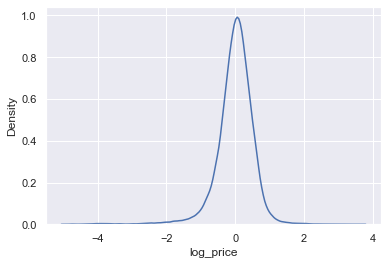

In [61]:
sns.kdeplot(y_train - y_hat)

√ &emsp; Errors have zero mean and are normally distributed.

##### Checking model by calculating R^2:

In [62]:
reg.score(x_train, y_train)

0.6042481850517413

<font color=red>After including 'fuel', 'title_status', and 'transmission', my model went from 54% accuracy to 62%</font>

##### Checking model by calculating Adjusted R^2:

In [63]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6041005418905656

In [64]:
reg.intercept_

9.553831232586495

In [65]:
reg.coef_

array([ 0.382462  , -0.26409595,  0.0008165 ,  0.00728894,  0.02173164,
        0.02532645, -0.02849628,  0.01274156,  0.04037163, -0.04350194,
        0.01147637, -0.02604534,  0.02773895, -0.02522694,  0.04669346,
        0.06041318, -0.00203552, -0.04270517, -0.06074926,  0.00771736,
        0.00824716,  0.03029144, -0.0590336 ,  0.00164917,  0.03730667,
        0.00266579, -0.03584041,  0.04060796, -0.02476914, -0.0208814 ,
       -0.03644745, -0.00538823, -0.0549574 , -0.02587043,  0.04610258,
        0.06261406,  0.02488193, -0.03295189, -0.02546077,  0.03269758,
        0.02663749, -0.05285949, -0.01110864, -0.067532  , -0.26936002,
       -0.10938837, -0.16017908,  0.00377314, -0.02110282, -0.01960965,
       -0.04179958, -0.04548619,  0.02537427,  0.05066663, -0.01103647,
       -0.01160421, -0.01863888, -0.04282481, -0.01406102, -0.03349229,
       -0.02115725, -0.01191645, -0.05638163, -0.02743387, -0.01234401,
       -0.01715221, -0.01107626, -0.04376914, -0.02289407, -0.01

In [66]:
pd.set_option('display.max_rows', 200)

In [67]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.sort_values(['Weights'], key=abs, ascending=False)

,Features,Weights
0,year,0.382462
44,fuel_gas,-0.269360
1,sqrt_odometer,-0.264096
46,fuel_other,-0.160179
45,fuel_hybrid,-0.109388
43,fuel_electric,-0.067532
88,state_oh,-0.063025
35,manufacturer_ram,0.062614
18,manufacturer_hyundai,-0.060749
15,manufacturer_gmc,0.060413


• Positive weight of 'year' means that as it increases, so does the target 'log_price' <br>
• Negative weight of 'odometer' means that as it increases, 'log_price' decreases

## Testing

In [68]:
y_hat_test = reg.predict(x_test)

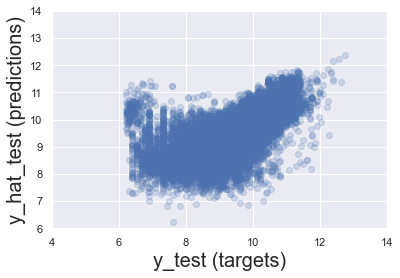

In [69]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('y_test (targets)', size=20)
plt.ylabel('y_hat_test (predictions)', size=20)
plt.xlim(4,14)
plt.ylim(6,14)

plt.show()

In [70]:
df = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df.head()

,Prediction
0,25753.417996
1,20585.078670
2,26476.597136
3,6164.017659
4,15532.675529


In [71]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.716555
1    10.714307
2    10.275017
3     8.366370
4     9.903438
Name: log_price, dtype: float64

In [72]:
df['Target'] = np.exp(y_test)
df

,Prediction,Target
0,25753.417996,16590.0
1,20585.078670,44995.0
2,26476.597136,28999.0
3,6164.017659,4300.0
4,15532.675529,19999.0
...,...,...
69714,26901.012608,34995.0
69715,12967.567932,4700.0
69716,15228.251817,25999.0
69717,23482.247663,22999.0


In [73]:
df['Residual'] = df['Target'] - df['Prediction']
df['Difference_%'] = np.absolute(df['Residual']/df['Target']*100)
df

,Prediction,Target,Residual,Difference_%
0,25753.417996,16590.0,-9163.417996,55.234587
1,20585.078670,44995.0,24409.921330,54.250297
2,26476.597136,28999.0,2522.402864,8.698241
3,6164.017659,4300.0,-1864.017659,43.349248
4,15532.675529,19999.0,4466.324471,22.332739
...,...,...,...,...
69714,26901.012608,34995.0,8093.987392,23.128982
69715,12967.567932,4700.0,-8267.567932,175.905701
69716,15228.251817,25999.0,10770.748183,41.427548
69717,23482.247663,22999.0,-483.247663,2.101168


In [74]:
df.describe()

,Prediction,Target,Residual,Difference_%
count,69719.000000,69719.000000,69719.000000,69719.000000
mean,17711.822828,19461.012464,1749.189636,60.643600
std,12462.353589,14969.389669,9607.123687,310.328701
min,507.340426,501.000000,-90601.509242,0.000532
25%,8627.120766,7950.000000,-2651.439945,12.953291
50%,14425.358085,15995.000000,486.164586,27.087635
75%,23760.680344,27990.000000,5623.282956,46.041315
max,240090.356385,349999.000000,218333.041637,13576.653911
